In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
train = pd.read_csv("../Data/test.csv")
test = pd.read_csv("../Data/train.csv")

In [29]:
train.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [30]:
test.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [31]:
train.shape

(172585, 13)

In [32]:
test.shape

(517754, 14)

In [33]:
train.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents
count,172585.000000,172585.000000,172585.000000,172585.000000,172585.000000
mean,604046.000000,2.494046,0.487263,46.102761,1.186059
std,49821.142441,1.119148,0.272343,15.787077,0.897161
min,517754.000000,1.000000,0.000000,25.000000,0.000000
25%,560900.000000,1.000000,0.260000,35.000000,1.000000
50%,604046.000000,2.000000,0.510000,45.000000,1.000000
75%,647192.000000,3.000000,0.710000,60.000000,2.000000
max,690338.000000,4.000000,1.000000,70.000000,7.000000


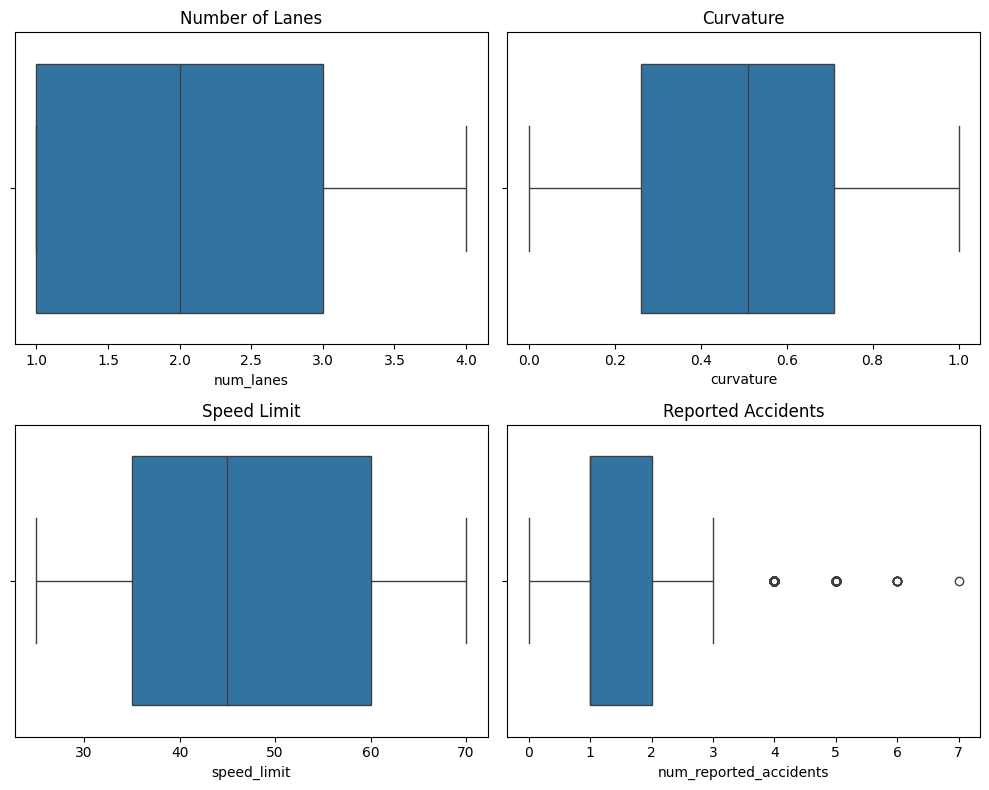

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid

sns.boxplot(x=train['num_lanes'], ax=axes[0, 0])
axes[0, 0].set_title('Number of Lanes')

sns.boxplot(x=train['curvature'], ax=axes[0, 1])
axes[0, 1].set_title('Curvature')

sns.boxplot(x=train['speed_limit'], ax=axes[1, 0])
axes[1, 0].set_title('Speed Limit')

sns.boxplot(x=train['num_reported_accidents'], ax=axes[1, 1])
axes[1, 1].set_title('Reported Accidents')

plt.tight_layout()
plt.show()

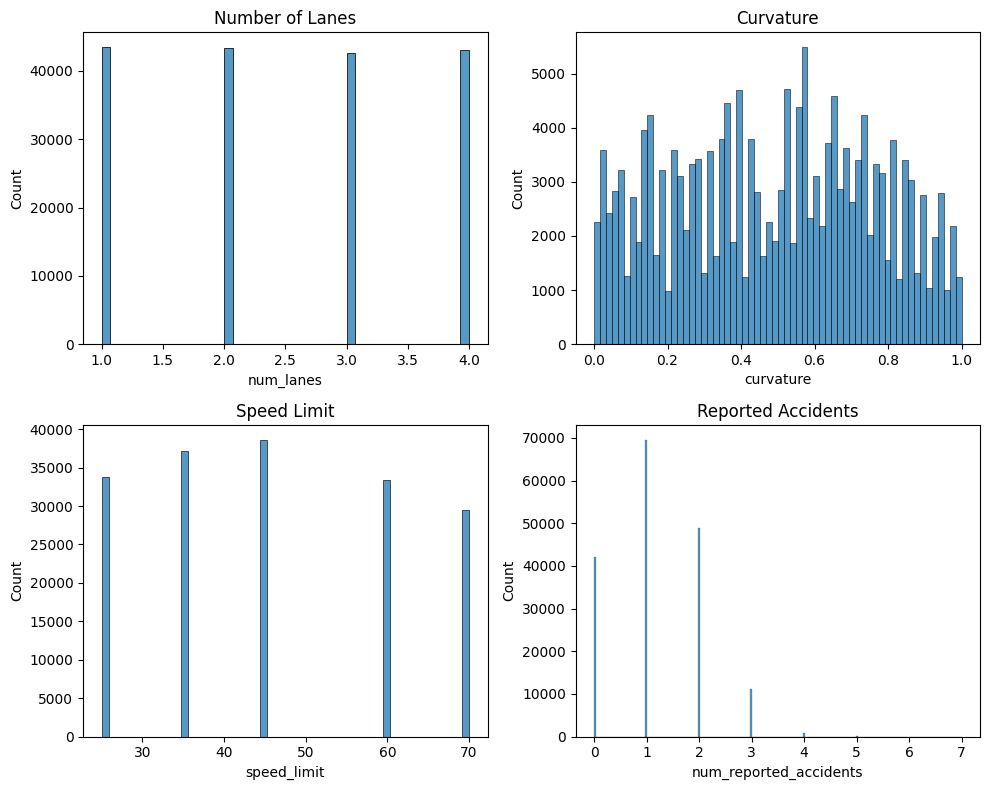

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid

sns.histplot(x=train['num_lanes'], ax=axes[0, 0])
axes[0, 0].set_title('Number of Lanes')

sns.histplot(x=train['curvature'], ax=axes[0, 1])
axes[0, 1].set_title('Curvature')

sns.histplot(x=train['speed_limit'], ax=axes[1, 0])
axes[1, 0].set_title('Speed Limit')

sns.histplot(x=train['num_reported_accidents'], ax=axes[1, 1])
axes[1, 1].set_title('Reported Accidents')

plt.tight_layout()
plt.show()

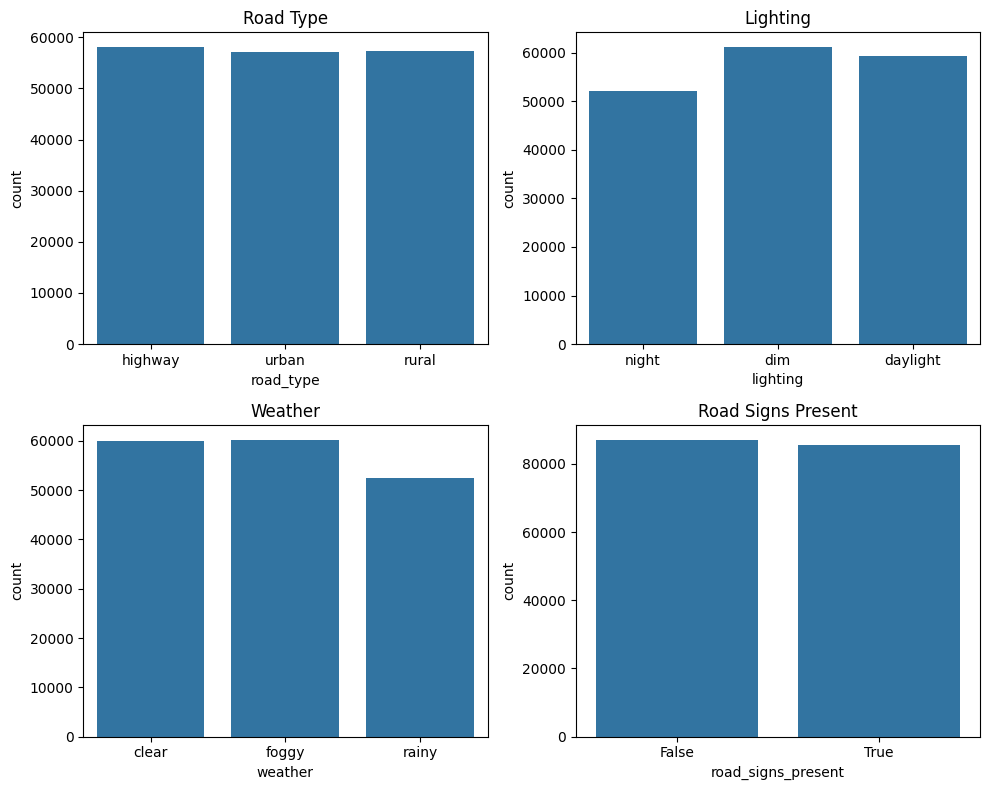

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid

sns.countplot(x=train['road_type'], ax=axes[0, 0])
axes[0, 0].set_title('Road Type')

sns.countplot(x=train['lighting'], ax=axes[0, 1])
axes[0, 1].set_title('Lighting')

sns.countplot(x=train['weather'], ax=axes[1, 0])
axes[1, 0].set_title('Weather')

sns.countplot(x=train['road_signs_present'], ax=axes[1, 1])
axes[1, 1].set_title('Road Signs Present')

plt.tight_layout()
plt.show()

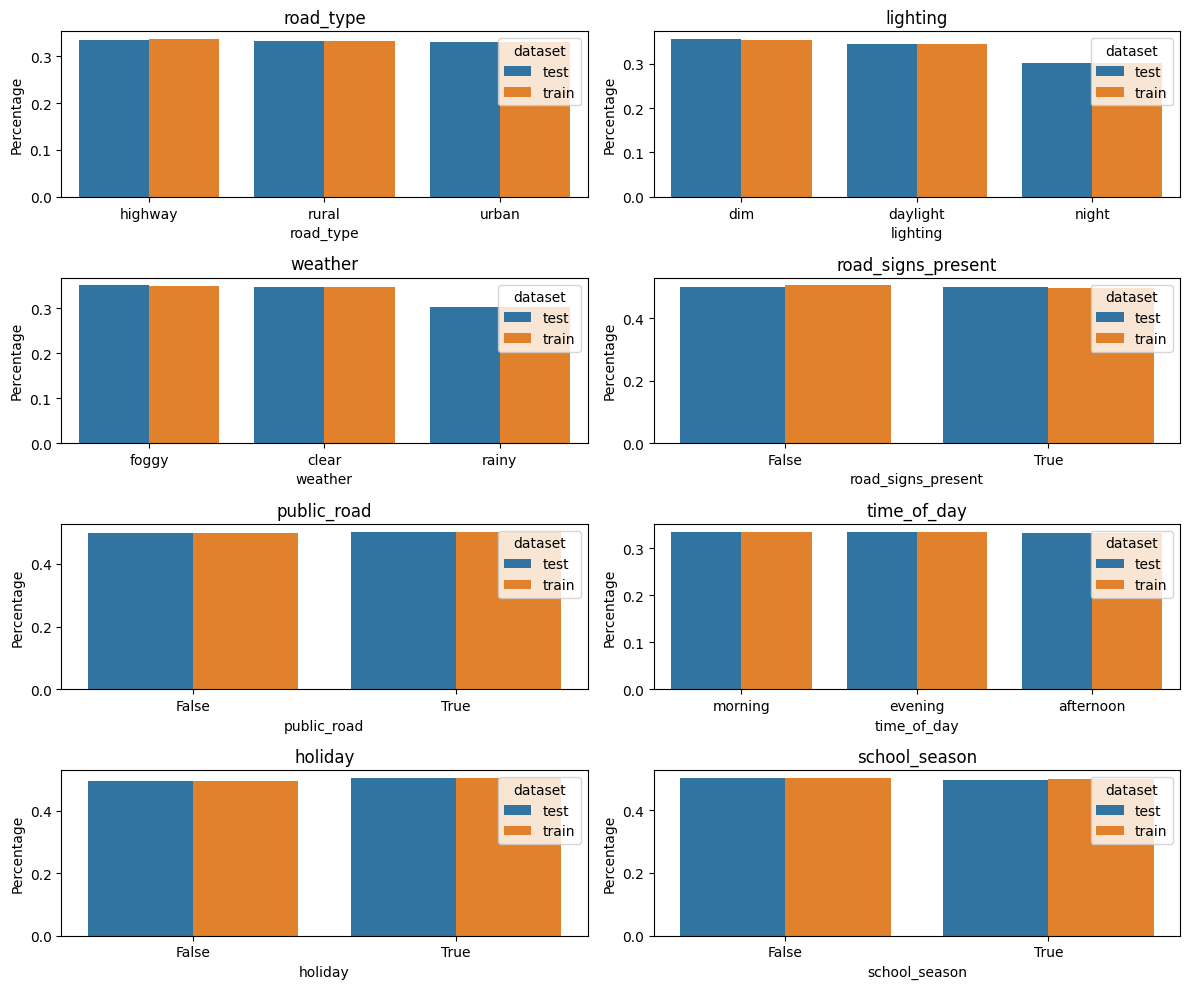

In [43]:
# Add dataset labels
train_copy = train.copy()
train_copy["dataset"] = "train"

test_copy = test.copy()
test_copy["dataset"] = "test"

combined = pd.concat([train_copy, test_copy], axis=0)

def plot_percentage_bars(variable, ax):
    # Compute percentages
    pct_df = (
        combined.groupby("dataset")[variable]
        .value_counts(normalize=True)
        .rename("percentage")
        .reset_index()
    )
    # Plot
    sns.barplot(x=variable, y="percentage", hue="dataset", data=pct_df, ax=ax)
    ax.set_ylabel("Percentage")
    ax.set_title(variable)

# Plot all four
fig, axes = plt.subplots(4, 2, figsize=(12, 10))

plot_percentage_bars("road_type", axes[0, 0])
plot_percentage_bars("lighting", axes[0, 1])
plot_percentage_bars("weather", axes[1, 0])
plot_percentage_bars("road_signs_present", axes[1, 1])
plot_percentage_bars("public_road", axes[2, 0])
plot_percentage_bars("time_of_day", axes[2, 1])
plot_percentage_bars("holiday", axes[3, 0])
plot_percentage_bars("school_season", axes[3, 1])

plt.tight_layout()
plt.show()

<Axes: xlabel='accident_risk', ylabel='Count'>

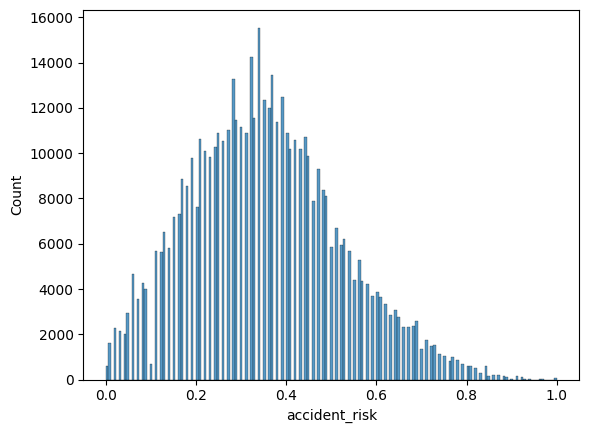

In [37]:
sns.histplot(test['accident_risk'])